# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
sns.set_theme(style="whitegrid")

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
df_office = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [15]:
df_max = df_office.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending = False)
df_max.head()

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
Name: Valor_Venda, dtype: float64

In [16]:
df_bigger_city = dict(df_max)
list(df_bigger_city.keys())[0]

'New York City'

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [17]:
df_total_per_date = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
df_total_per_date.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

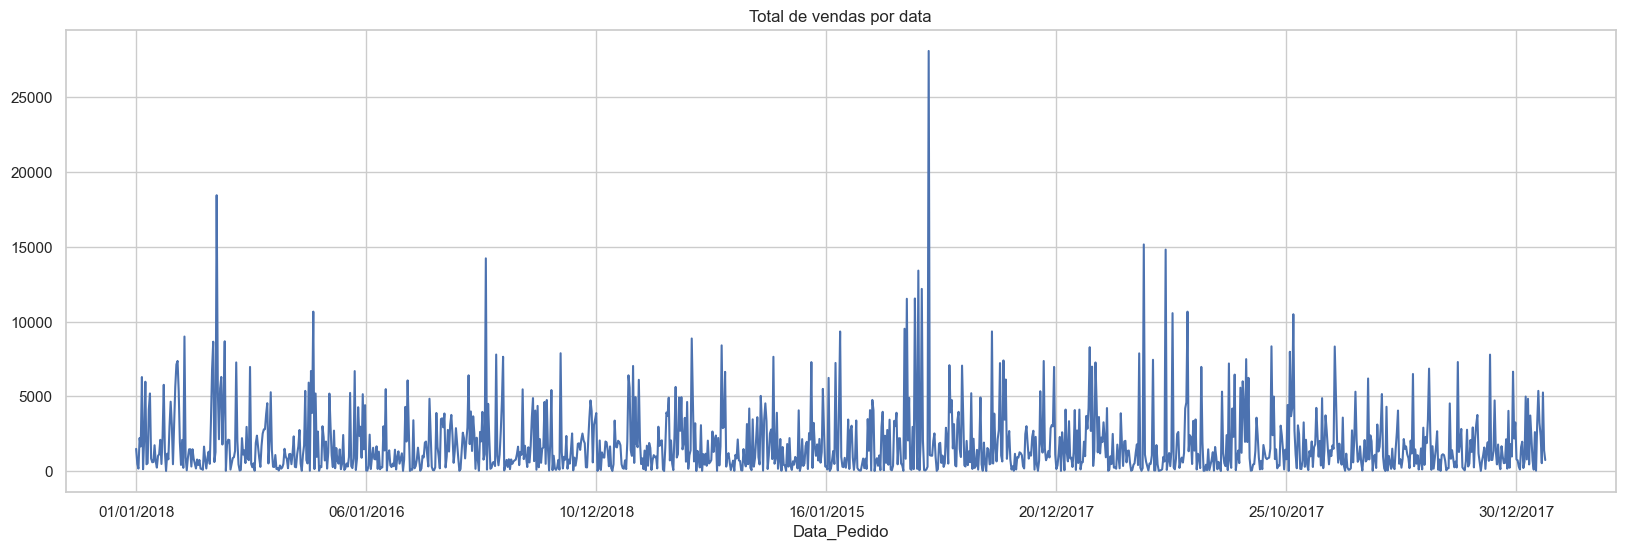

In [18]:
plt.figure(figsize = (20, 6))
df_total_per_date.plot(x='Data_Pedido', y='Valor_Venda', color='b')
plt.title("Total de vendas por data")
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [19]:
df_total_per_state = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index().sort_values(by = "Valor_Venda", ascending = False)
df_total_per_state.count()

Estado         49
Valor_Venda    49
dtype: int64

<Figure size 3000x600 with 0 Axes>

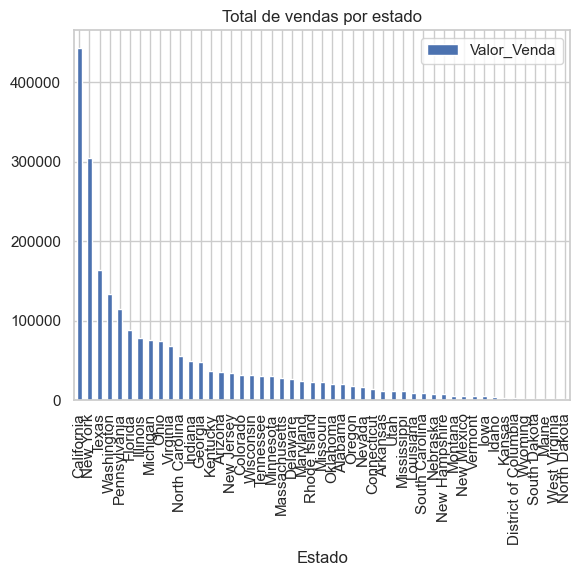

In [20]:
plt.figure(figsize = (30, 6))
df_total_per_state.plot.bar(x='Estado', y='Valor_Venda', color='b')
plt.title("Total de vendas por estado")
plt.show()

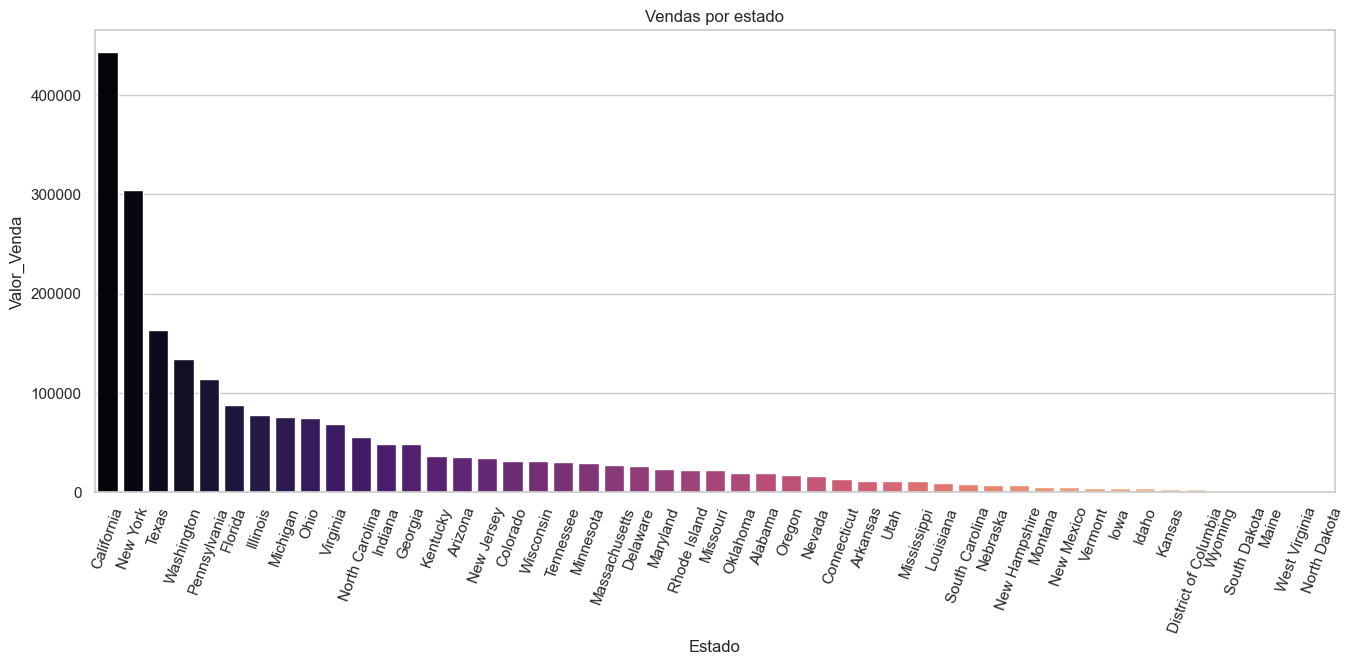

In [21]:
plt.figure(figsize = (16,6))
sns.set_palette("magma",49 )
sns.barplot(data = df_total_per_state,
            y = 'Valor_Venda',
            x = 'Estado'
).set_title("Vendas por estado")
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [22]:
df_ten = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

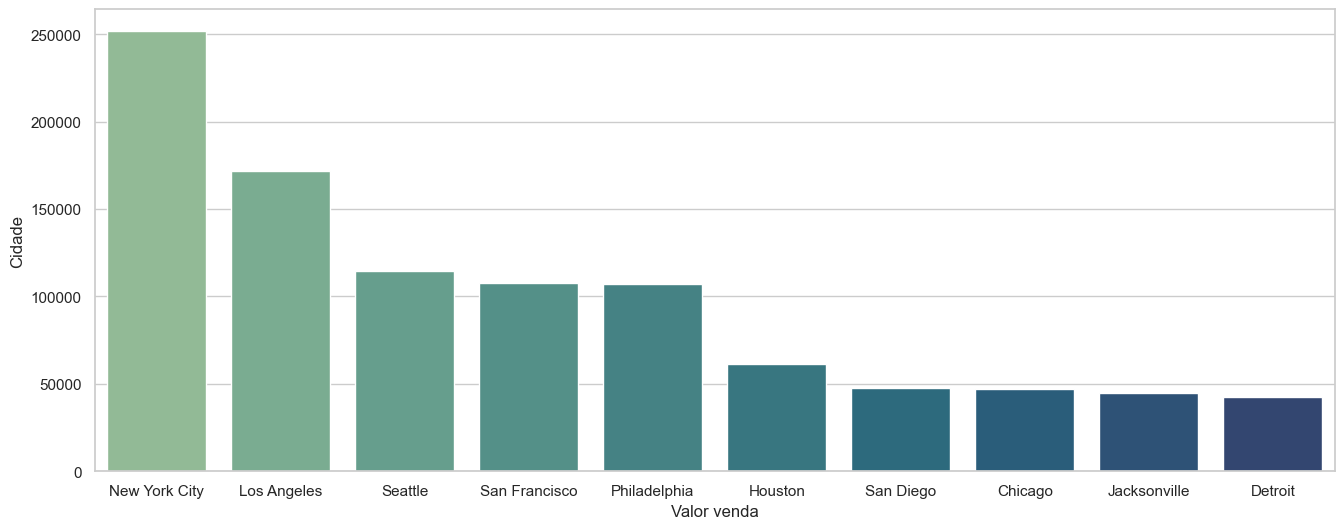

In [23]:
plt.figure(figsize = (16, 6))
sns.set_palette("crest",10 )
sns.barplot(y = 'Valor_Venda',
         x = 'Cidade',
         data = df_ten
)

plt.xlabel('Valor venda')
plt.ylabel('Cidade')

plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [24]:

df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values\
                            (by = 'Valor_Venda', ascending = False)
df_seg

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [25]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

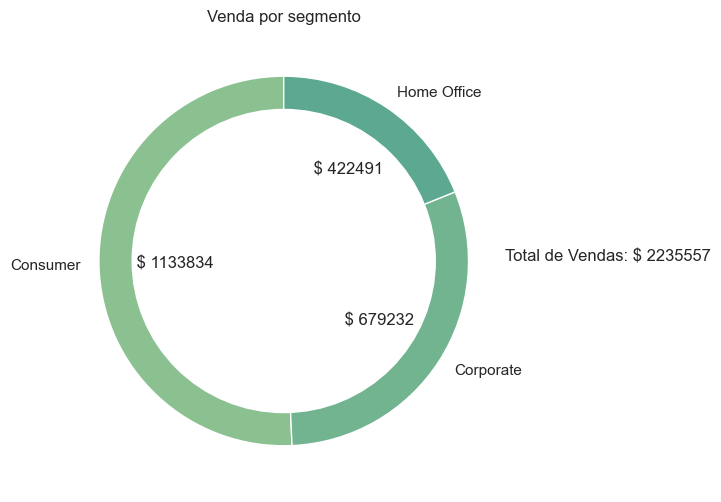

In [26]:
plt.figure(figsize = (16,6))

plt.pie(df_seg['Valor_Venda'],
        labels = df_seg['Segmento'],
        autopct = autopct_format(df_seg['Valor_Venda']),
        startangle = 90
    
)

centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_seg['Valor_Venda']))), xy = (1.2, 0))
plt.title('Venda por segmento')
plt.show()       

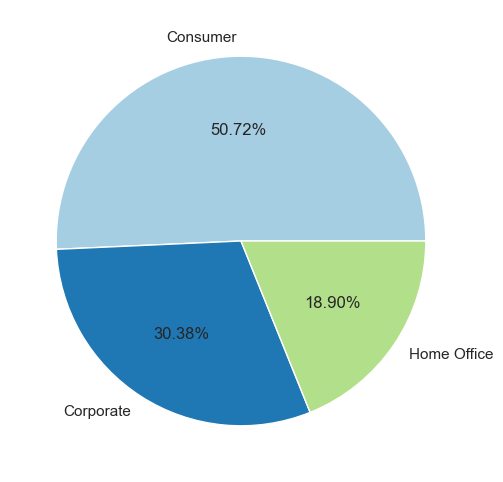

In [27]:
plt.figure(figsize = (16, 6))
sns.set_palette("Paired")
plt.pie(df_seg['Valor_Venda'],
        labels = df_seg['Segmento'],
        autopct = '%1.2f%%'
)
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [28]:
df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values\
                            (by = 'Valor_Venda', ascending = False)
df_seg

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [29]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].str.split('/').str[2]
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [30]:
df_year = df_dsa.groupby('Ano')['Valor_Venda'].sum().reset_index().sort_values\
                            (by = 'Valor_Venda', ascending = False)
df_year

,Ano,Valor_Venda
3,2018,715350.9152
2,2017,595365.9240
0,2015,470768.6001
1,2016,454072.5154


In [31]:
df_seg_year = df_dsa[['Segmento','Ano','Valor_Venda']].groupby(['Ano','Segmento']).sum()
df_seg_year

Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [32]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [33]:
df_dsa.loc[df_dsa['Valor_Venda'] > 1000, 'Desconto'] = 0.15 
df_dsa.loc[df_dsa['Valor_Venda'] < 1000, 'Desconto'] = 0.10

In [34]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [35]:
df_dsa[df_dsa['Desconto'] == 0.15].count()[0]

457

In [36]:
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [37]:
df_dsa['Valor_Com_Desconto'] = df_dsa['Valor_Venda'] * (1 - df_dsa['Desconto'] )
df_dsa[df_dsa['Desconto'] == 0.15].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Com_Desconto
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,0.15,1450.2564
24,CA-2016-106320,25/09/2016,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,0.15,887.9355
27,US-2016-150630,17/09/2016,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,0.15,2620.9155
35,CA-2017-117590,08/12/2017,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,0.15,932.9124
54,CA-2017-105816,11/12/2017,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,0.15,875.4575


In [38]:
#Média antes
df_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [39]:
round(df_antes_desconto.mean(),1)

2116.8

In [40]:
#Média depois do desconto
df_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Com_Desconto']

In [41]:
round(df_depois_desconto.mean(),1)

1799.3

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [42]:
#Por segmento
df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].mean().reset_index()
df_seg

,Segmento,Valor_Venda
0,Consumer,225.011775
1,Corporate,231.819859
2,Home Office,244.073618


In [43]:
#Por ano
df_year = df_dsa.groupby('Ano')['Valor_Venda'].mean().reset_index()
df_year

,Ano,Valor_Venda
0,2015,245.064342
1,2016,222.148980
2,2017,237.292118
3,2018,221.745479


In [44]:
#Por Mês
df_dsa['Mes'] = df_dsa['Data_Pedido'].str.split('/').str[1]
df_month = df_dsa.groupby('Mes')['Valor_Venda'].mean().reset_index()
df_month

,Mes,Valor_Venda
0,01,259.669633
1,02,201.297688
2,03,291.913903
3,04,207.511879
4,05,214.563064
5,06,211.473571
6,07,206.537987
7,08,226.213737
8,09,221.116666
9,10,246.447292


In [45]:
df_dsa_all = df_dsa.groupby(['Segmento','Ano','Mes'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df_dsa_all

sum        mean  median
Segmento    Ano  Mes                               
Consumer    2015 01    6896.629  146.736787  36.440
                 02    3167.854  117.327926  22.776
                 03   11869.304  152.170564  49.172
                 04    9108.612  189.762750  49.875
                 05   12628.271  191.337439  56.910
...                         ...         ...     ...
Home Office 2018 08    5813.300  176.160606  71.980
                 09   19183.826  249.140597  63.686
                 10   29705.515  412.576597  48.075
                 11   24009.384  247.519423  56.560
                 12   13022.391  224.523983  49.260

[144 rows x 3 columns]

In [46]:
segmentos = df_dsa_all.index.get_level_values(0)
ano = df_dsa_all.index.get_level_values(1)
mes = df_dsa_all.index.get_level_values(2)

<Figure size 1200x1000 with 0 Axes>

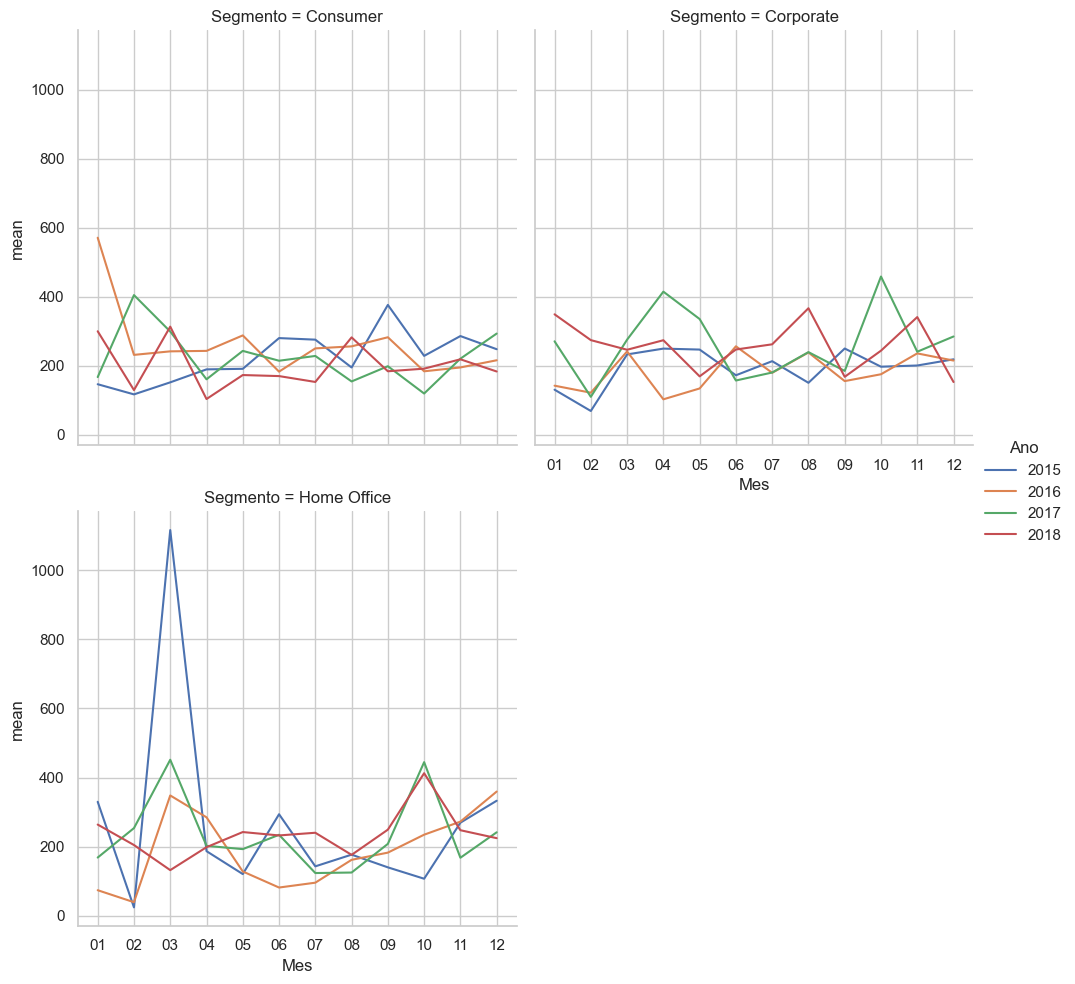

In [47]:
plt.figure(figsize = (12, 10))
sns.set()
sns.set_theme(style="whitegrid")
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa_all, 
                   y = 'mean', 
                   x = mes,
                   hue = ano, 
                   col = segmentos,
                   col_wrap = 2)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [48]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Com_Desconto,Mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [59]:
df_sub = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values(by = 'Valor_Venda', ascending = False).head(12)
df_sub

Valor_Venda  Desconto  Valor_Com_Desconto
Categoria       SubCategoria                                           
Technology      Phones        325271.2940     90.15        286990.85830
Furniture       Chairs        317919.6250     63.30        279816.75990
Office Supplies Storage       216188.3620     84.75        191433.27010
Furniture       Tables        202083.3600     34.15        176938.45555
Office Supplies Binders       194723.3810    149.10        169623.33495
Technology      Machines      189238.6310     13.65        162213.65840
                Accessories   162791.3620     76.10        144162.61990
                Copiers       146248.0940      8.30        125379.85260
Furniture       Bookcases     108045.0467     23.50         95035.86235
Office Supplies Appliances    104061.6930     46.45         91938.64420
Furniture       Furnishings    88862.7700     92.75         79694.54640
Office Supplies Paper          76312.7640    132.90         68681.48760

In [70]:
df_sub = df_sub[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
df_sub

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [69]:
df_cat = df_sub.groupby('Categoria')['Valor_Venda'].sum().reset_index()
df_cat

,Categoria,Valor_Venda
0,Furniture,716910.8017
1,Office Supplies,591286.2000
2,Technology,823549.3810


In [77]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [78]:
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

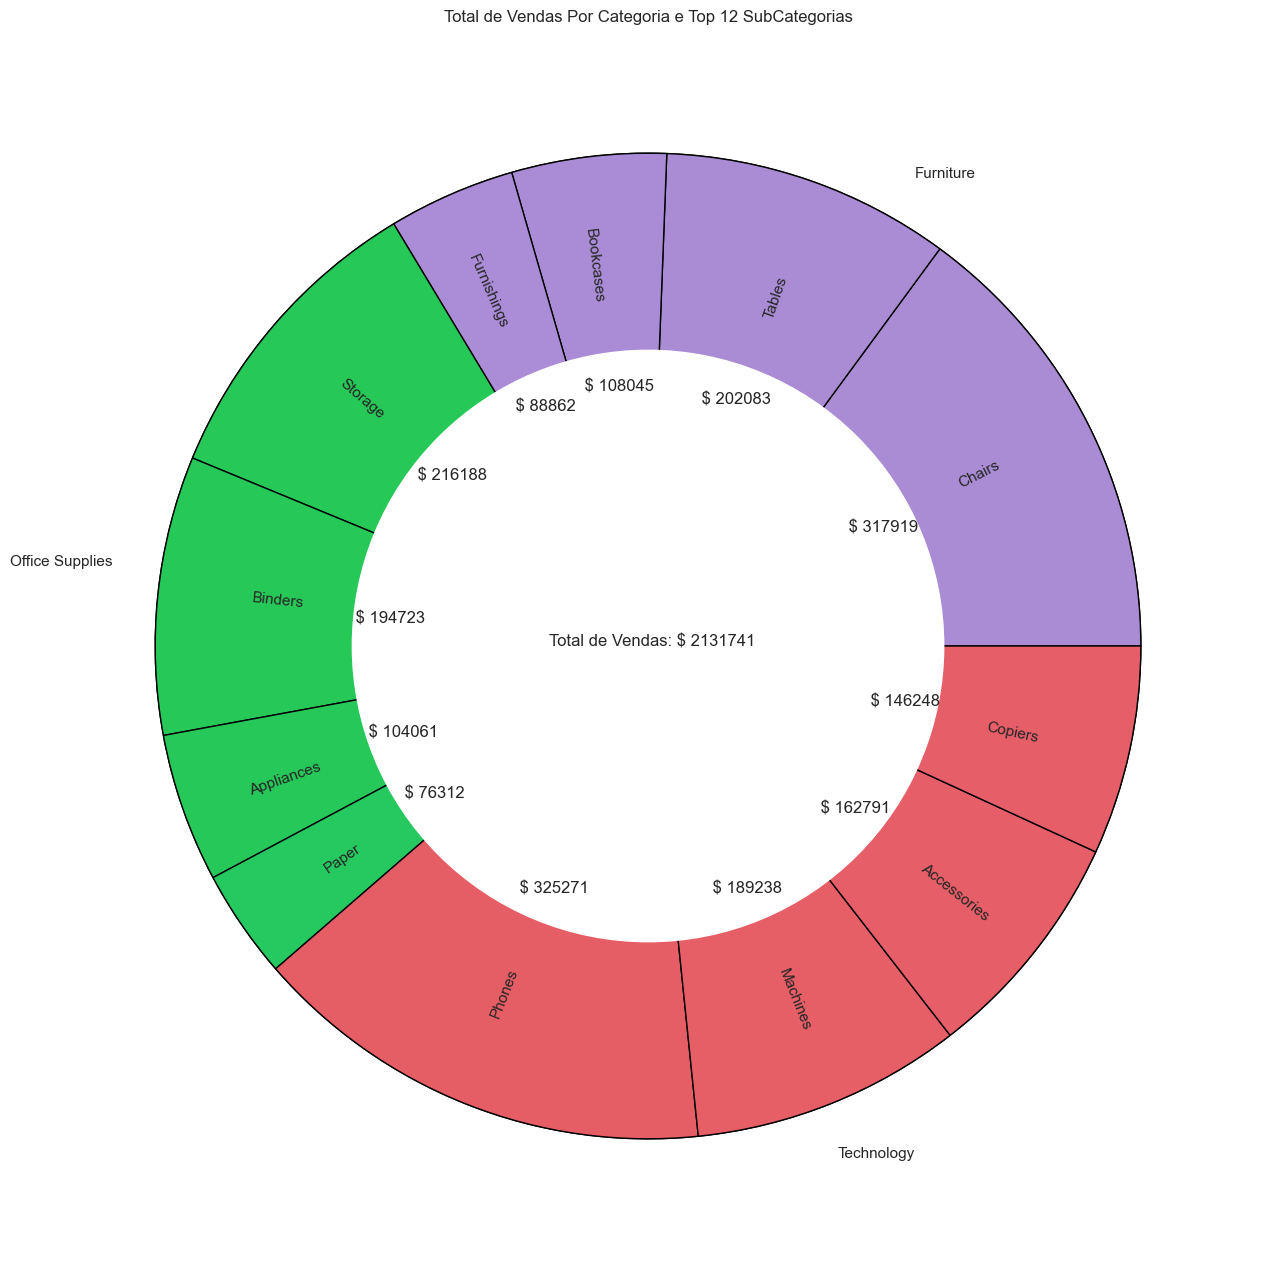

In [86]:
#Plot

fig, ax = plt.subplots(figsize = (18,16))

# Gráfico das categorias
p1 = ax.pie(df_cat['Valor_Venda'], 
            radius = 1,
            labels = df_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'black'),
            colors = cores_categorias
           )

# Gráfico das subcategorias
p2 = ax.pie(df_sub['Valor_Venda'],
            radius = ,
            labels = df_sub['SubCategoria'],
            autopct = autopct_format(df_sub['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'Black'), 
            pctdistance = 0.53,
            rotatelabels = True
           )

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_sub['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()


# Fim